## Created by Jessie McDonald and used in Mcdonald and Weiss 2021. Optimized for PERiLS data by Joshua Ostaszewski and used in Ostaszewski et al. 2024.

In [1]:
import pandas as pd
import datetime as dt
from functions import calc_dewpoint, calc_thetae, calc_thetav
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as md
import glob
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
%pylab inline
SNSfile = 'E:\\PERiLS_Y2\\Excel_SN\\Before_CPA\\PERiLS_IOP4Y2_thermo.xlsx' #Change to directory with SN metadata, approximate cold pool TOA, storm motion, and reflectivity angles.
sns = pd.read_excel(SNSfile)
savedir = 'C:\\Users\\joshu\\Desktop\\' #Change to your own directory

IOP = 'IOP4' #Switch to a specific IOP

#Function that grabs 1Hz data for a respective date, SN, and period of time
def get_1hz(date, probe, starttime, duration, seconds=False):
    directory= 'E:\\PERiLS_Y2\\Data\\PERiLS_data\\IOP_data\\IOP4_20230331\\level2\\*.txt'
    all_sn = glob.glob(f"{directory}")
    all_sn.sort()
    print(probe)
    print(all_sn[probe])
    data = pd.read_csv(all_sn[probe], header=0, index_col = 'Time', parse_dates=['Time'], date_parser=pd.to_datetime)
    if seconds == False:
       # handle when data from two days is needed
        s = (starttime-dt.timedelta(minutes=1))
        e = (starttime+dt.timedelta(minutes=duration))
        return data[starttime:starttime+dt.timedelta(minutes=duration)]
    if seconds == True:
       # handle when data from two days is needed
        s = (starttime-dt.timedelta(minutes=1))
        e = (starttime+dt.timedelta(seconds=duration))
        return data[starttime:starttime+dt.timedelta(seconds=duration)]

Populating the interactive namespace from numpy and matplotlib


# Find TOA

Manually set delta_k for each event/whole project. This value is arbitrary. It is the change in temp that is used to determine the cold pool edge location. In the CSV, the TOA_coldpool column is an approximate TOA. This code takes that approximate time and finds a more accurate TOA. If 0.3K does not work, the code will check 0.2k and 0.1K before failing.

101A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0101A_IOP5_level2.txt


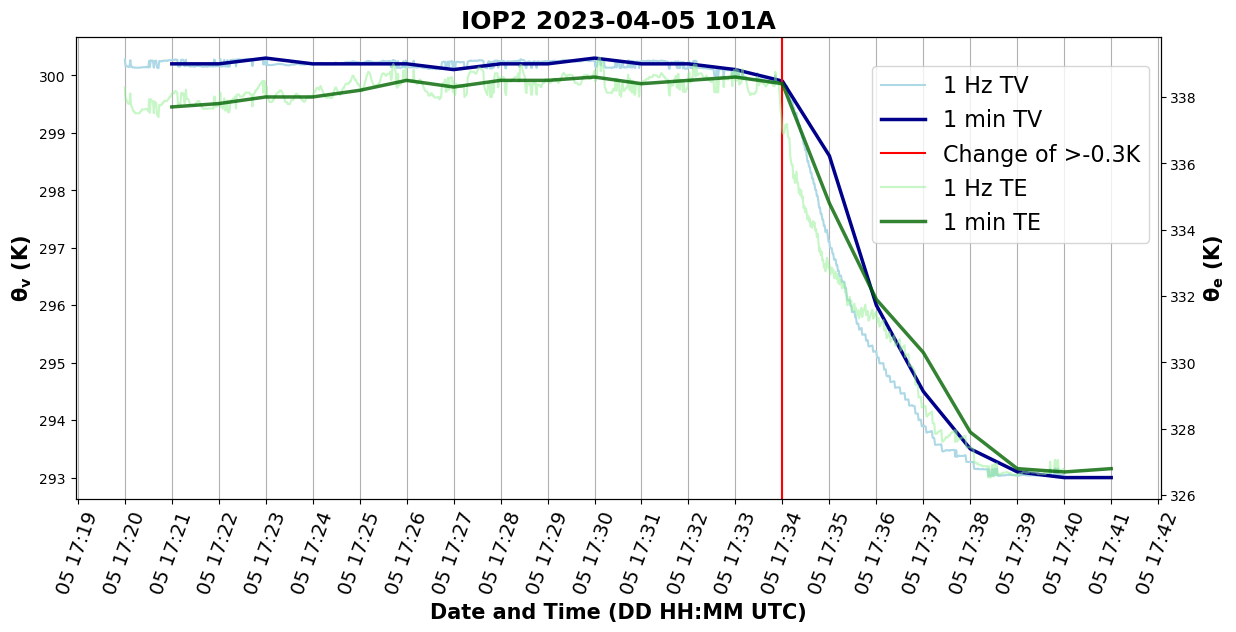

102A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0102A_IOP5_level2.txt


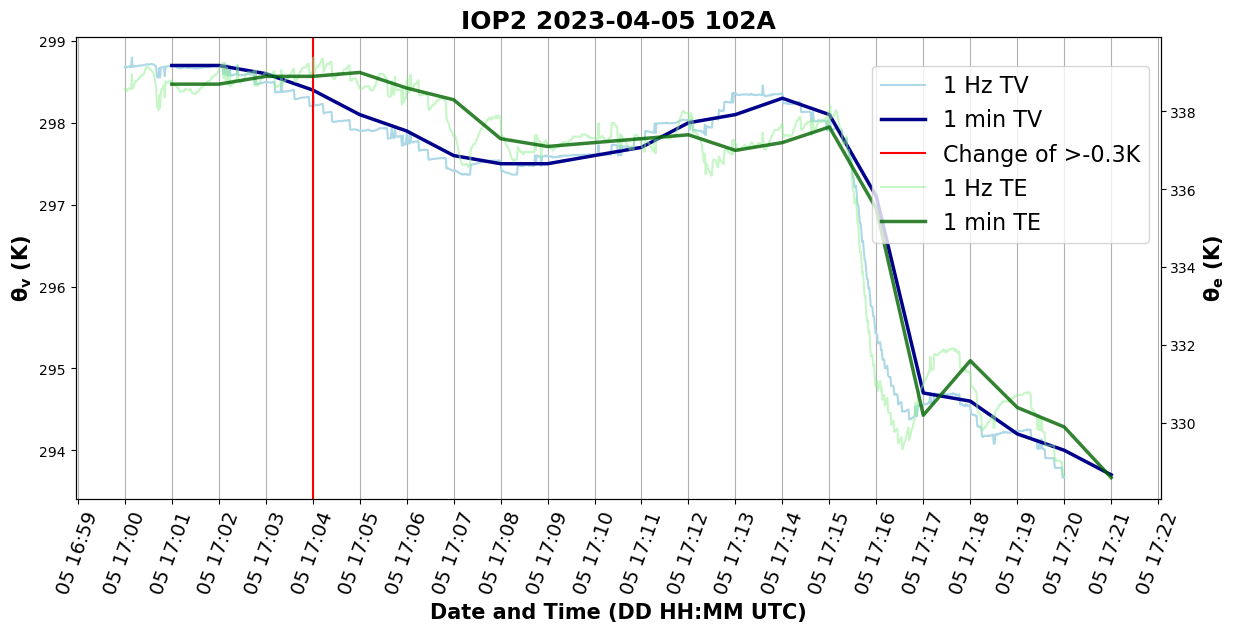

103A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0103A_IOP5_level2.txt


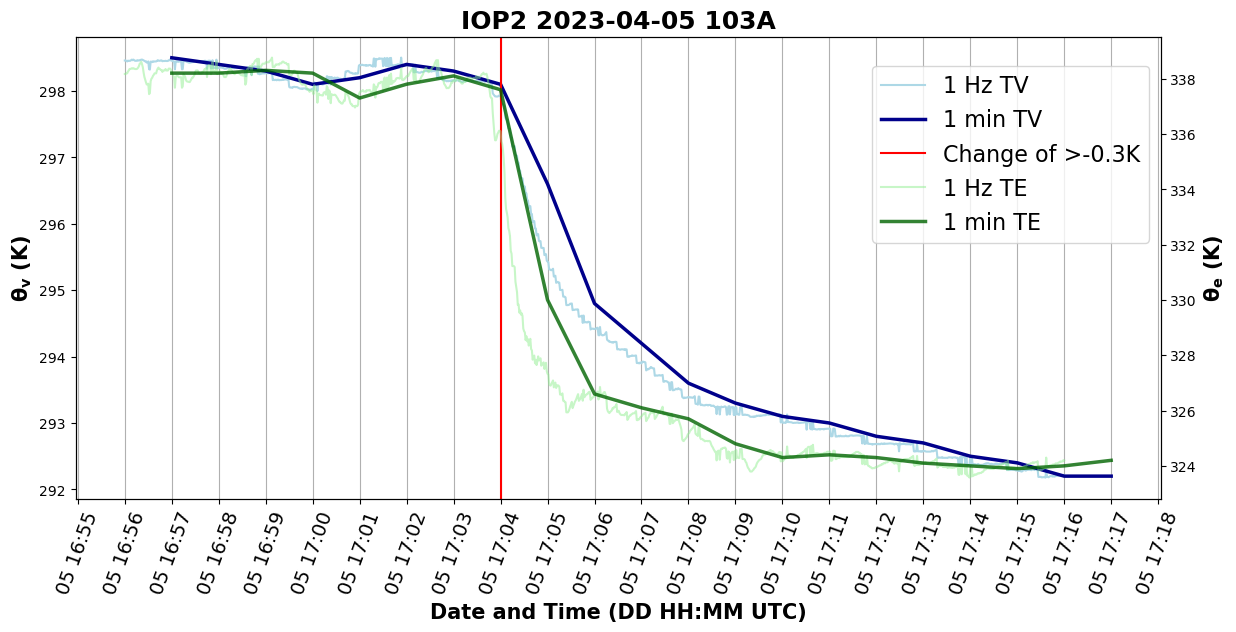

104A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0104A_IOP5_level2.txt


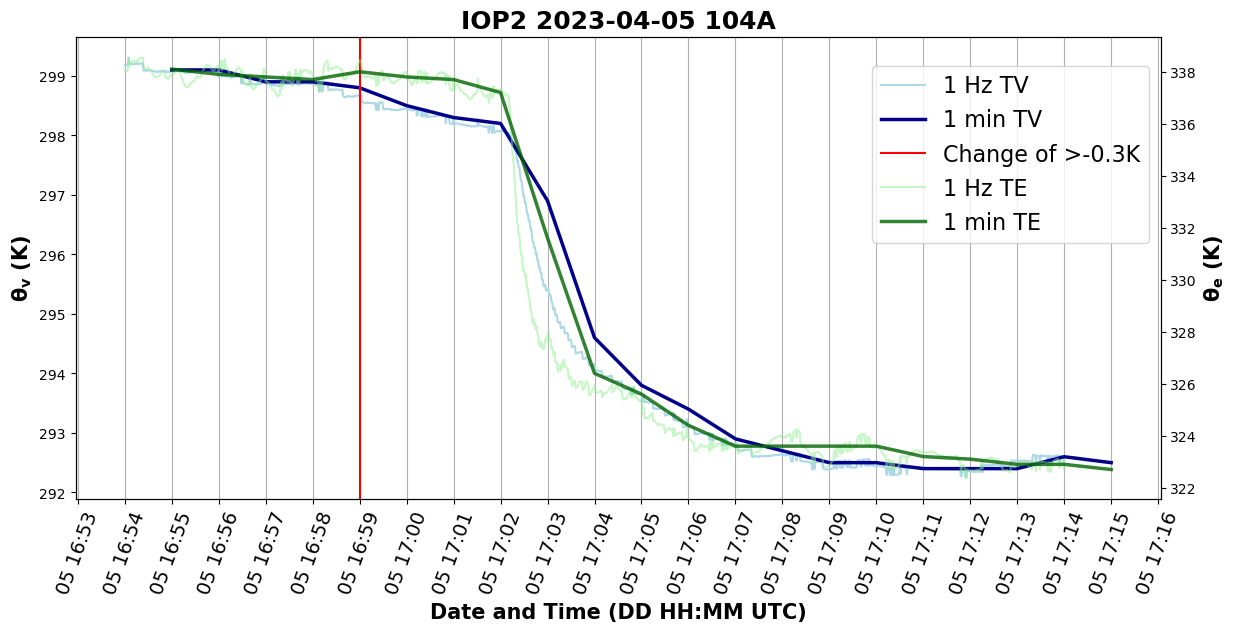

105A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0105A_IOP5_level2.txt


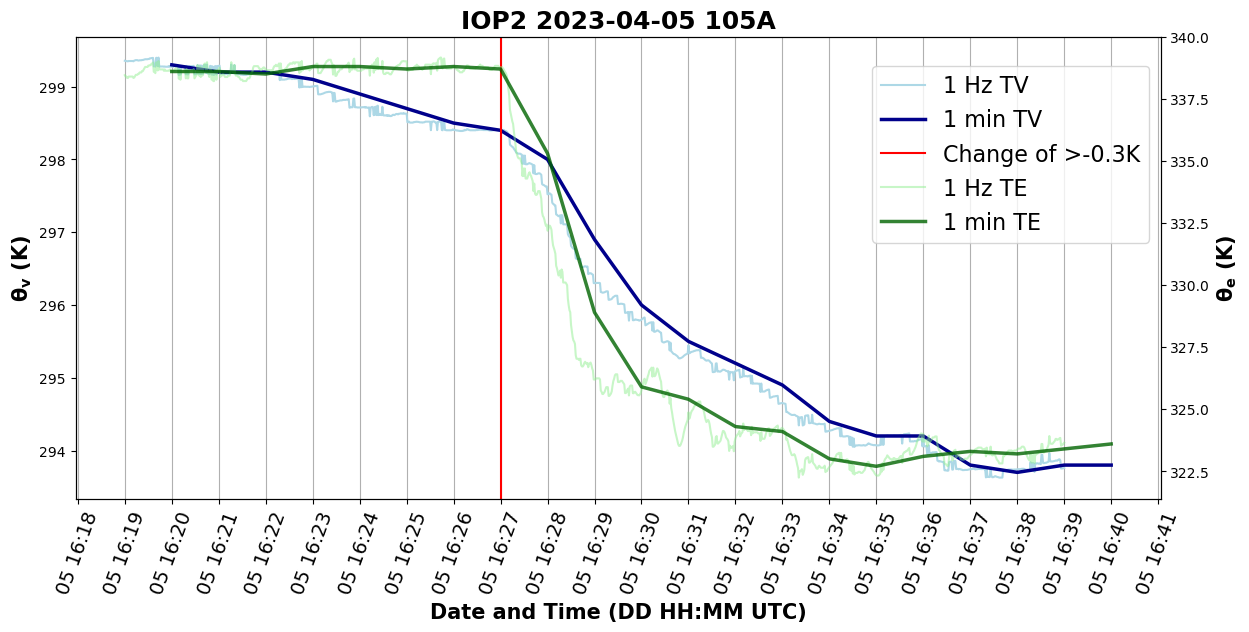

106A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0106A_IOP5_level2.txt


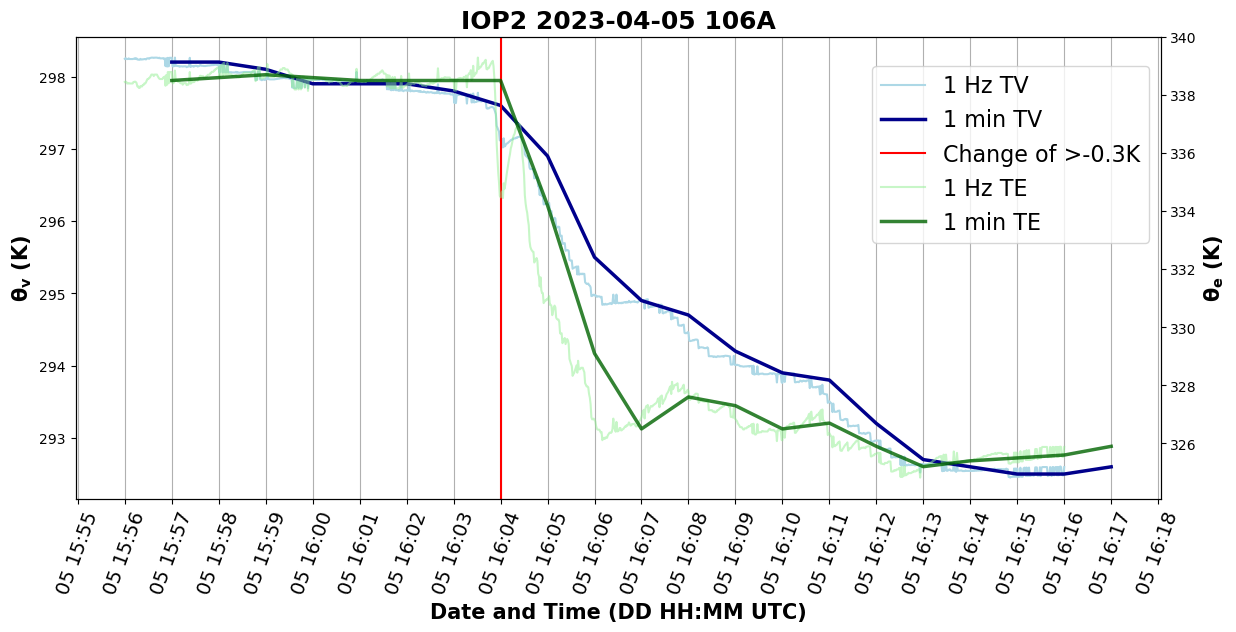

107A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0107A_IOP5_level2.txt


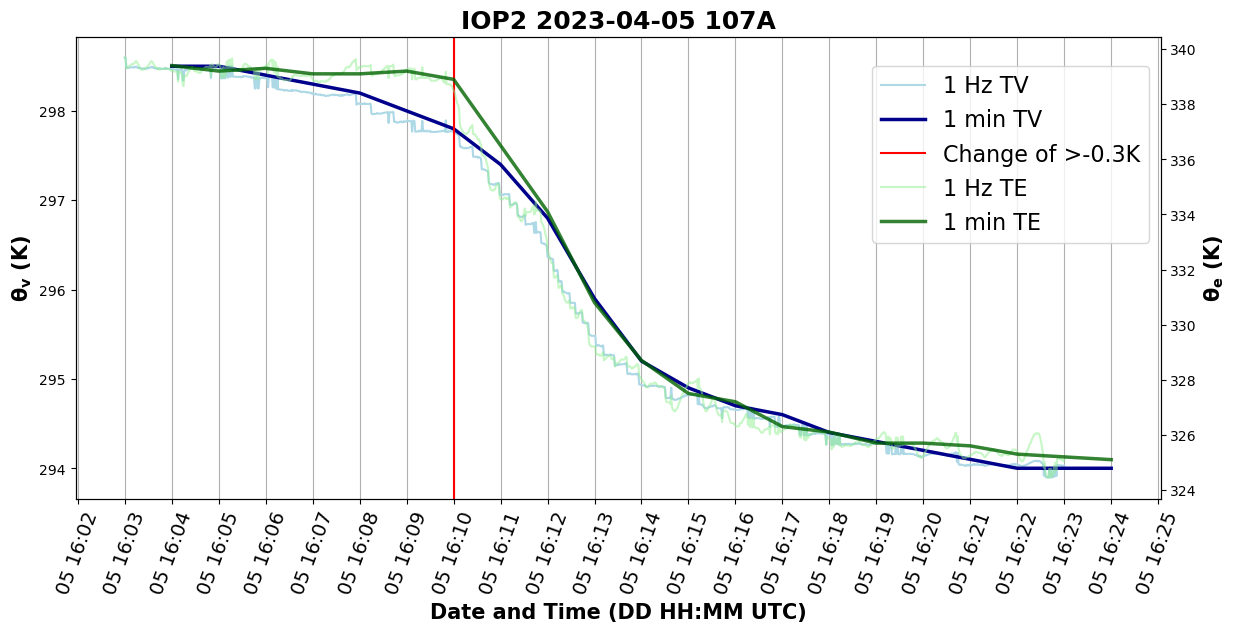

108A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0108A_IOP5_level2.txt


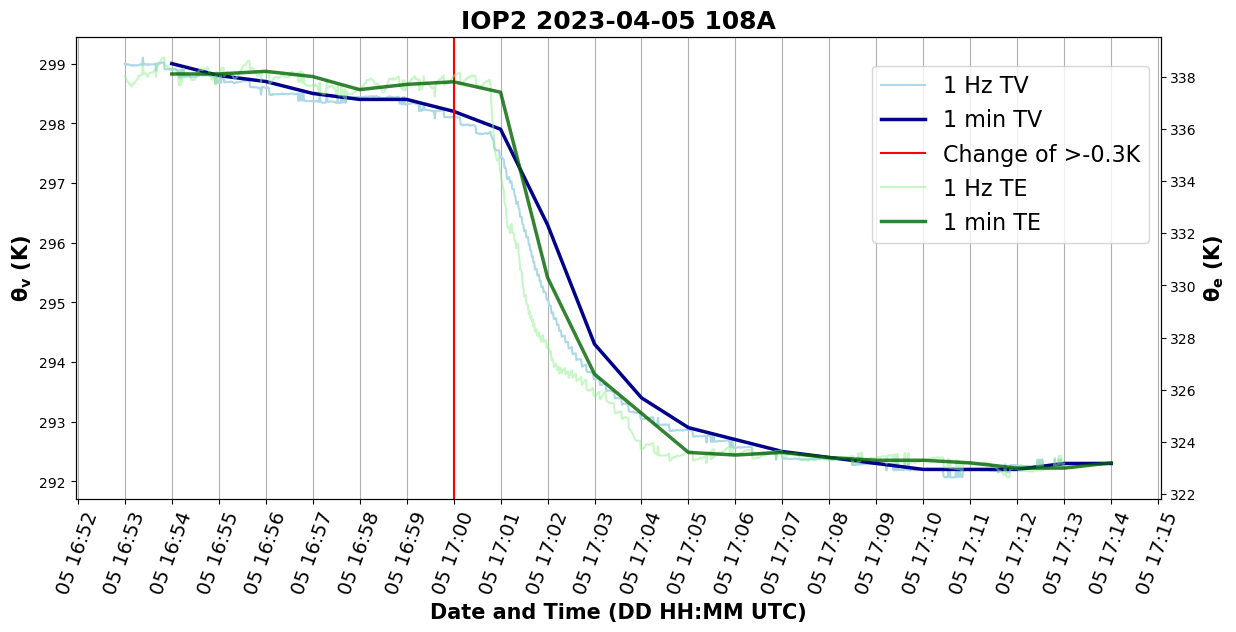

109A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0109A_IOP5_level2.txt


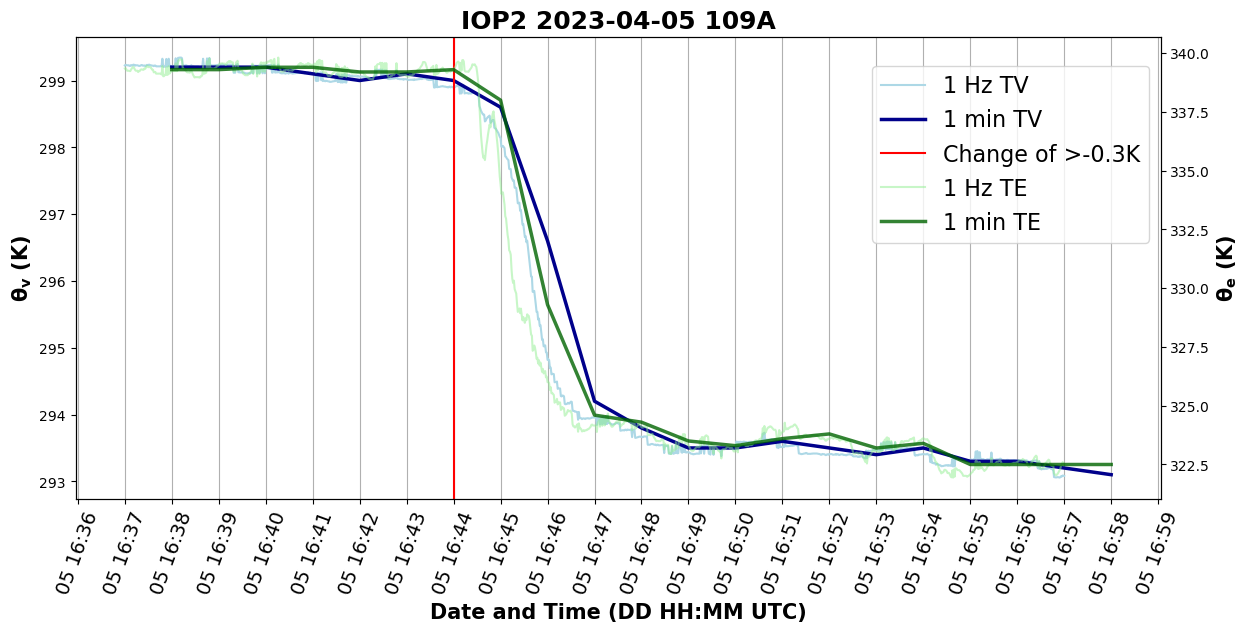

110A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0110A_IOP5_level2.txt


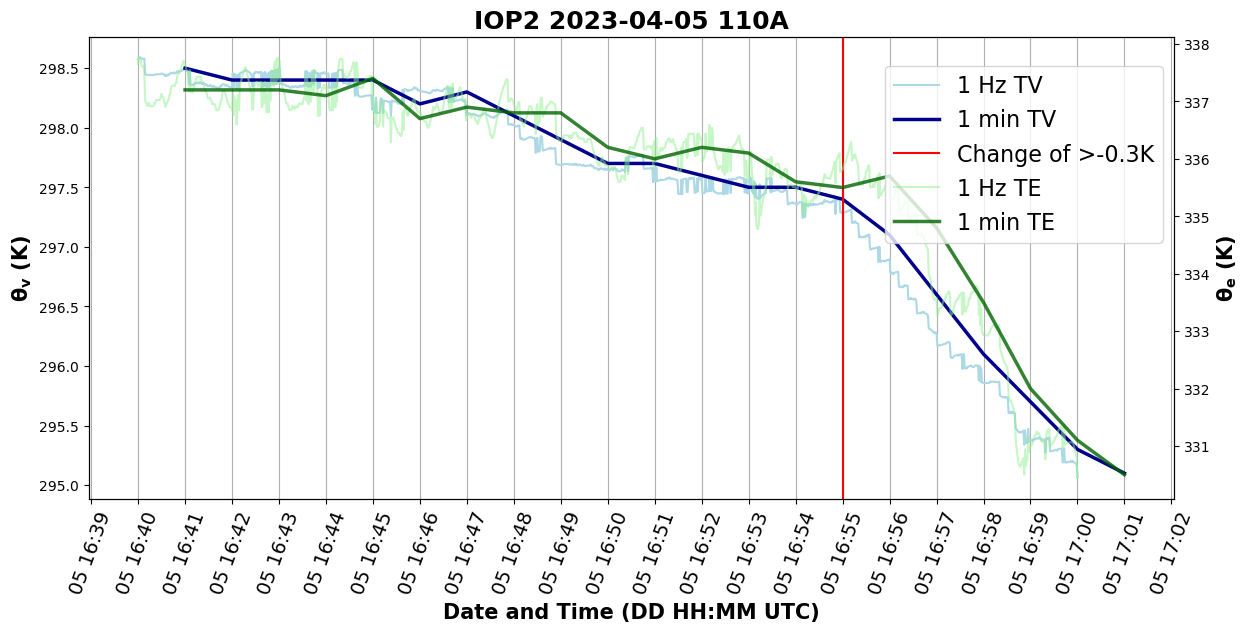

111A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0111A_IOP5_level2.txt


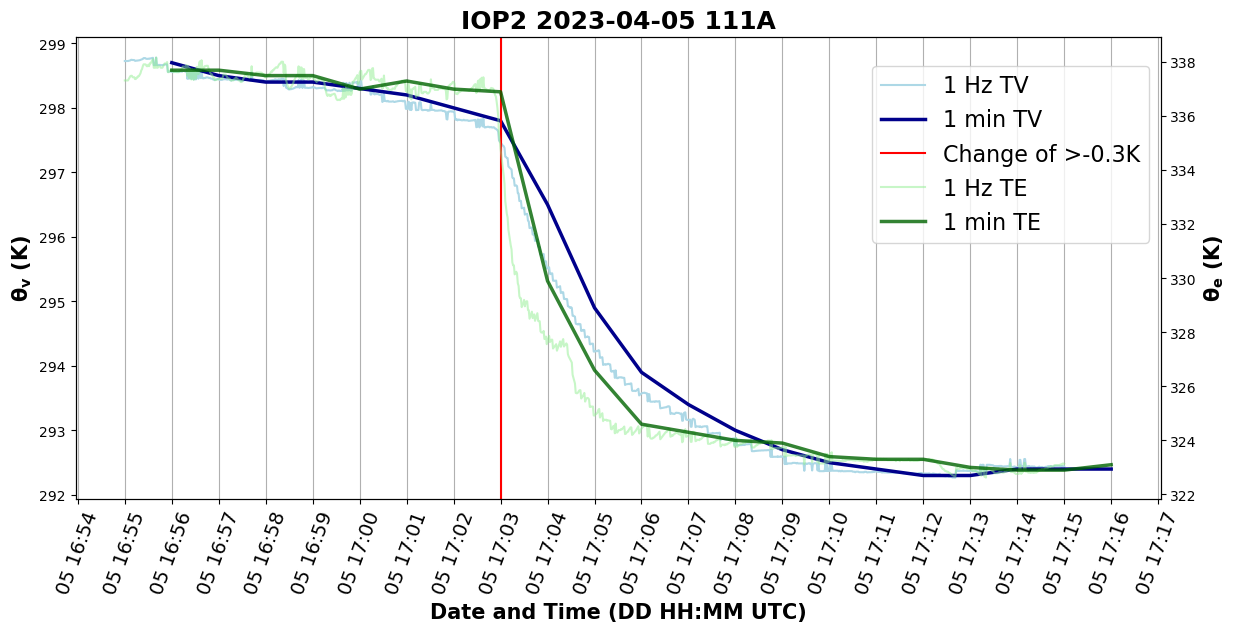

112A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0112A_IOP5_level2.txt


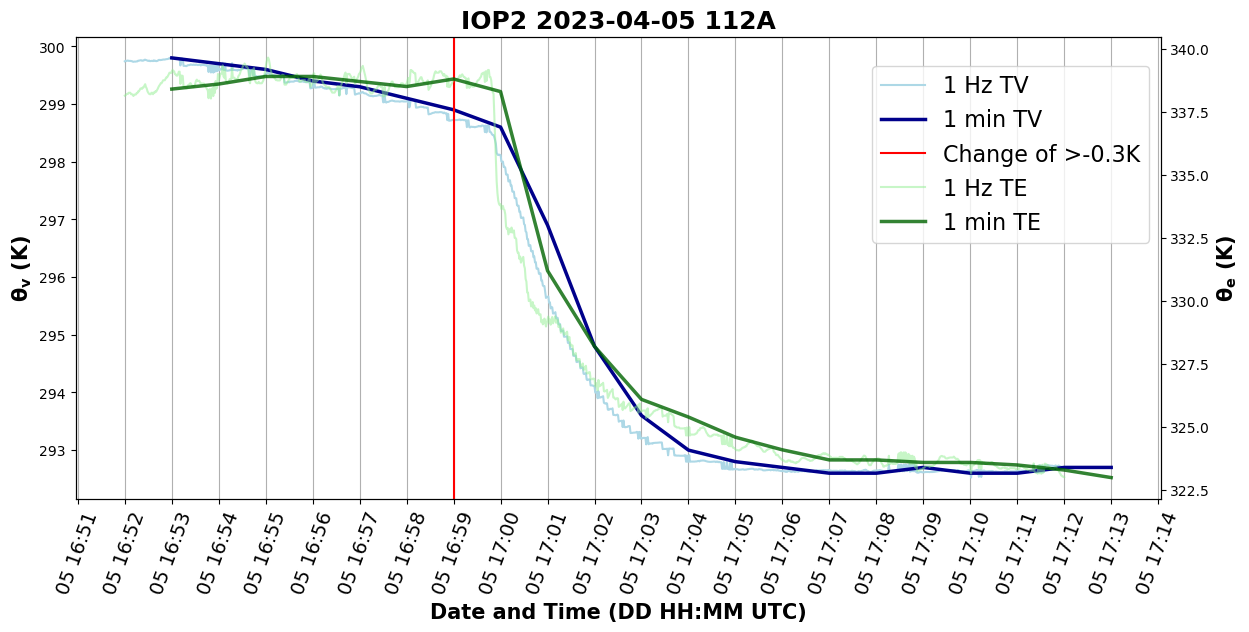

213A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0213A_IOP5_level2.txt


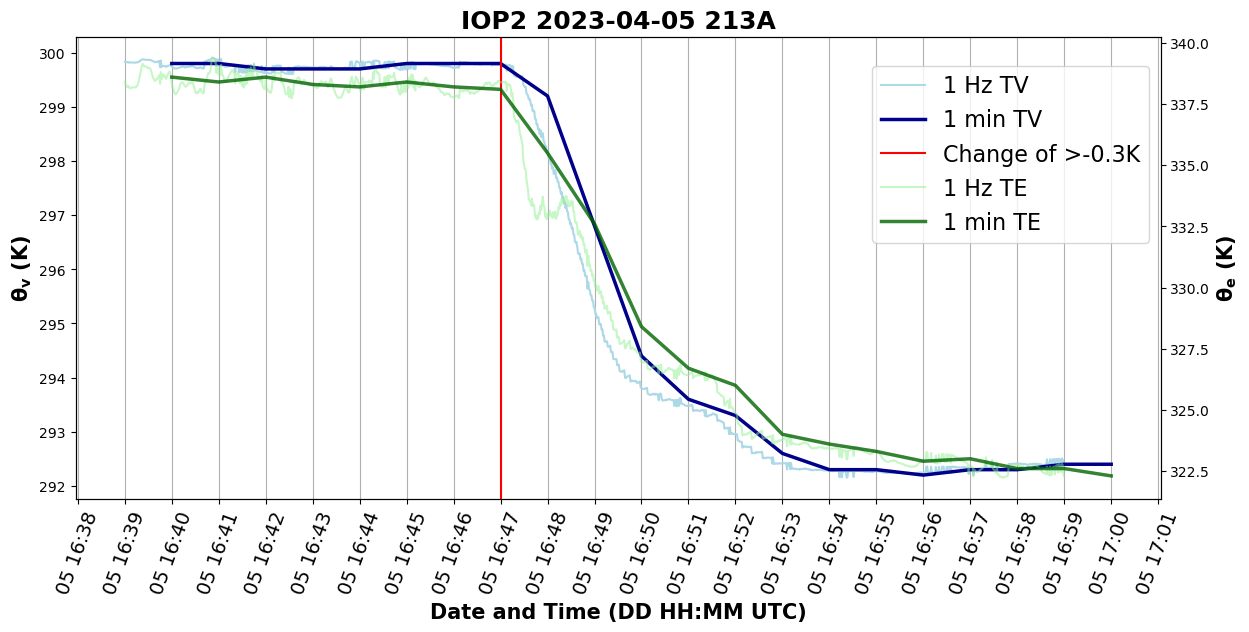

214A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0214A_IOP5_level2.txt


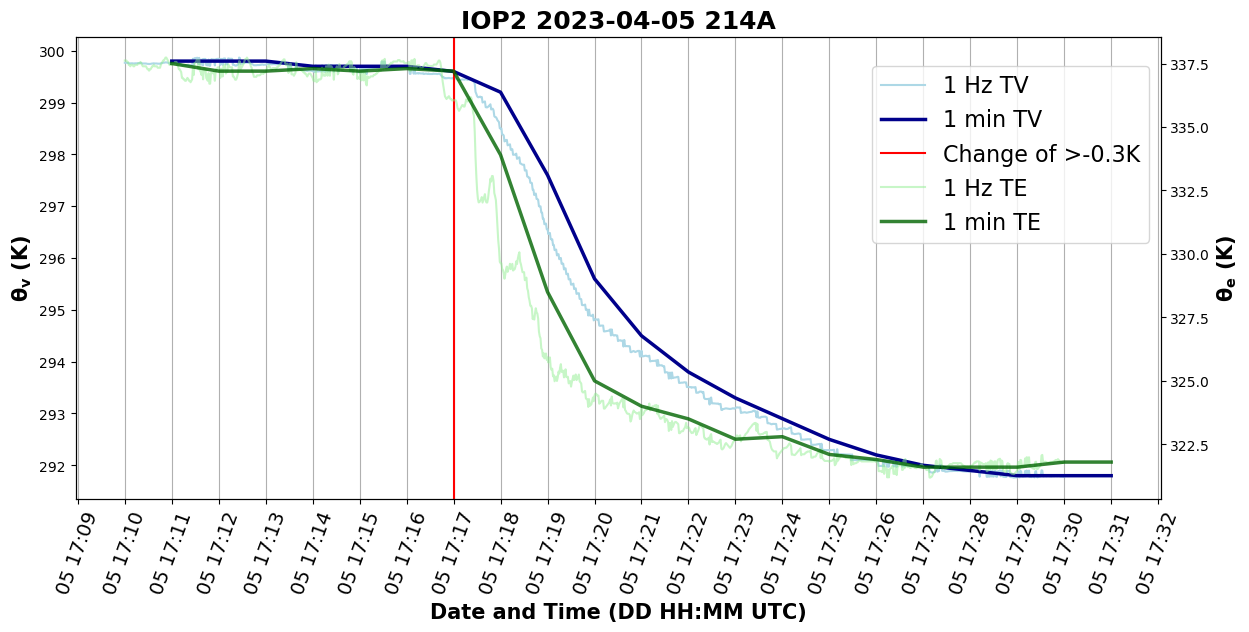

215A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0215A_IOP5_level2.txt


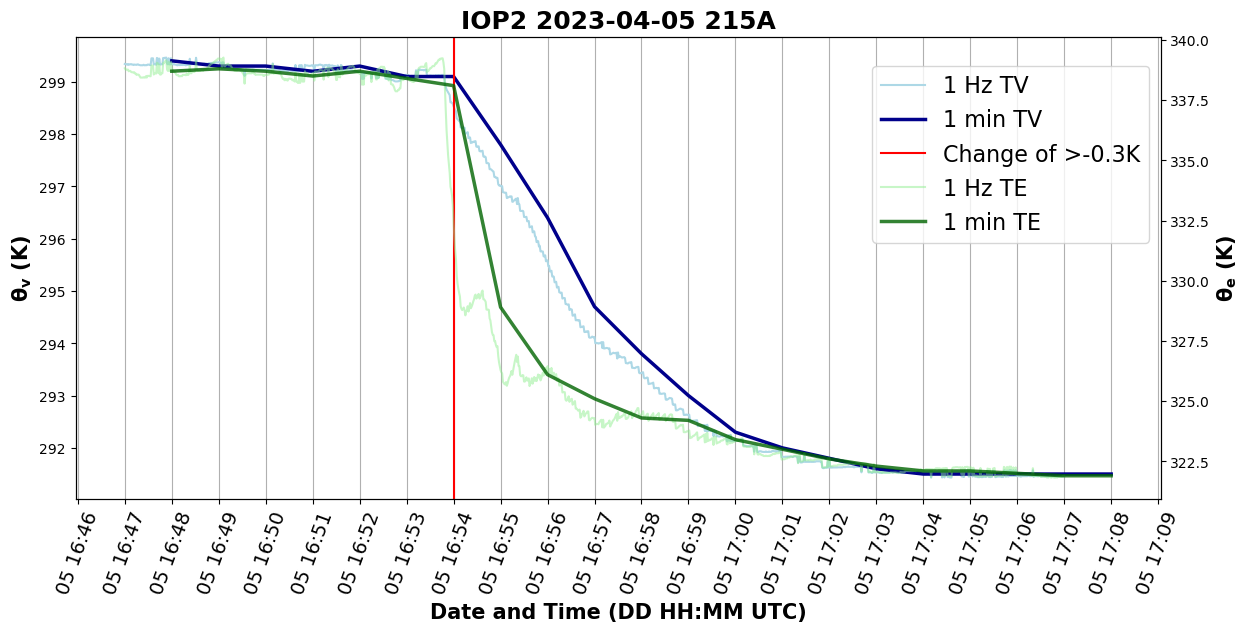

216A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0216A_IOP5_level2.txt


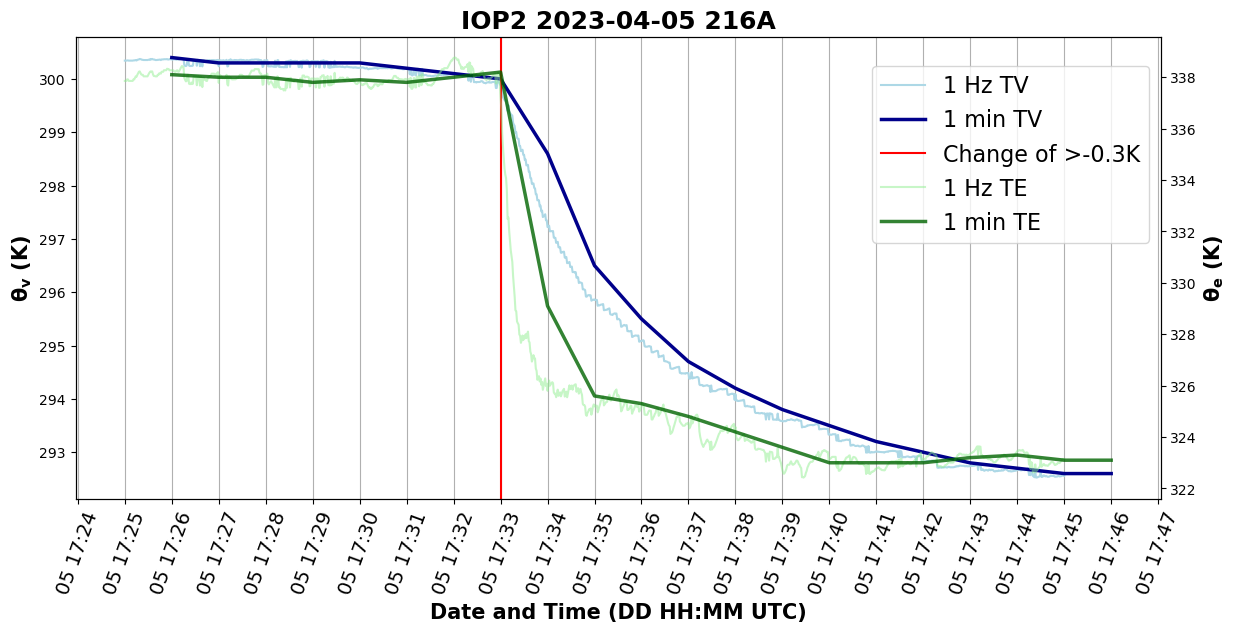

217A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0217A_IOP5_level2.txt


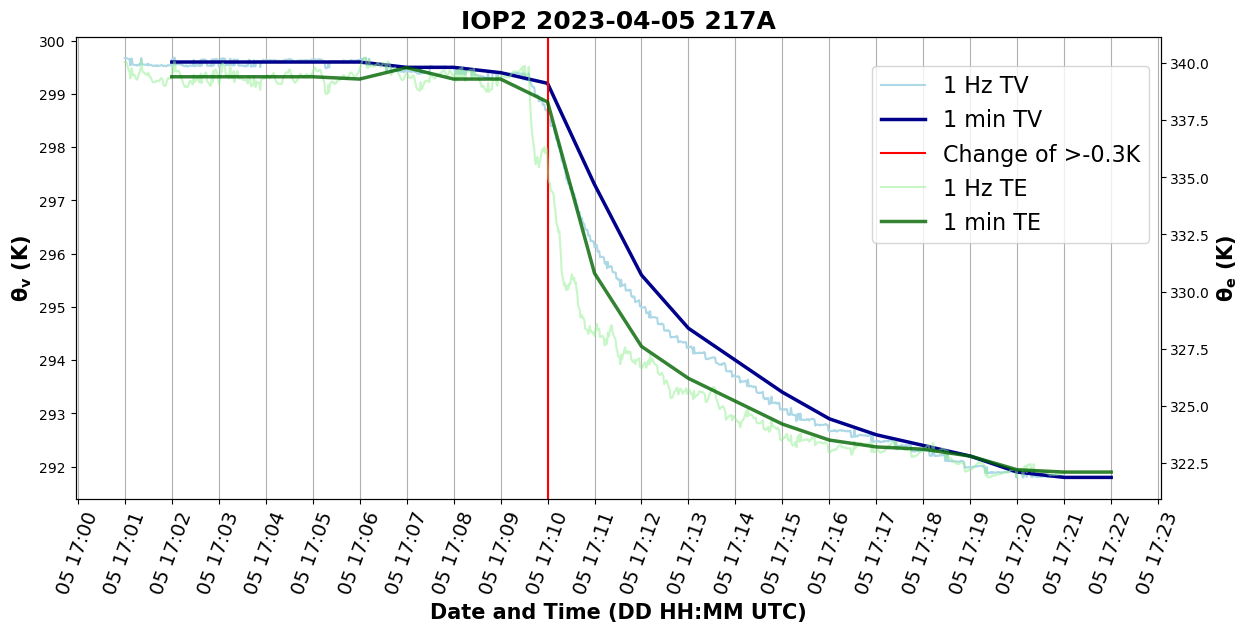

218A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0218A_IOP5_level2.txt


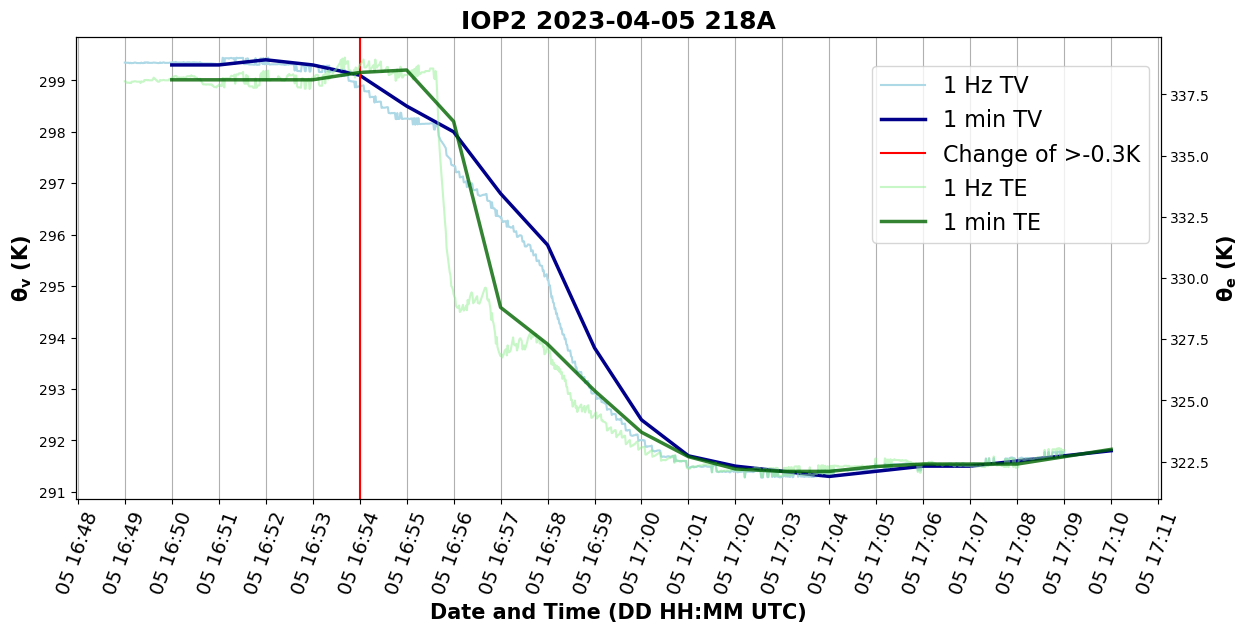

219A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0219A_IOP5_level2.txt


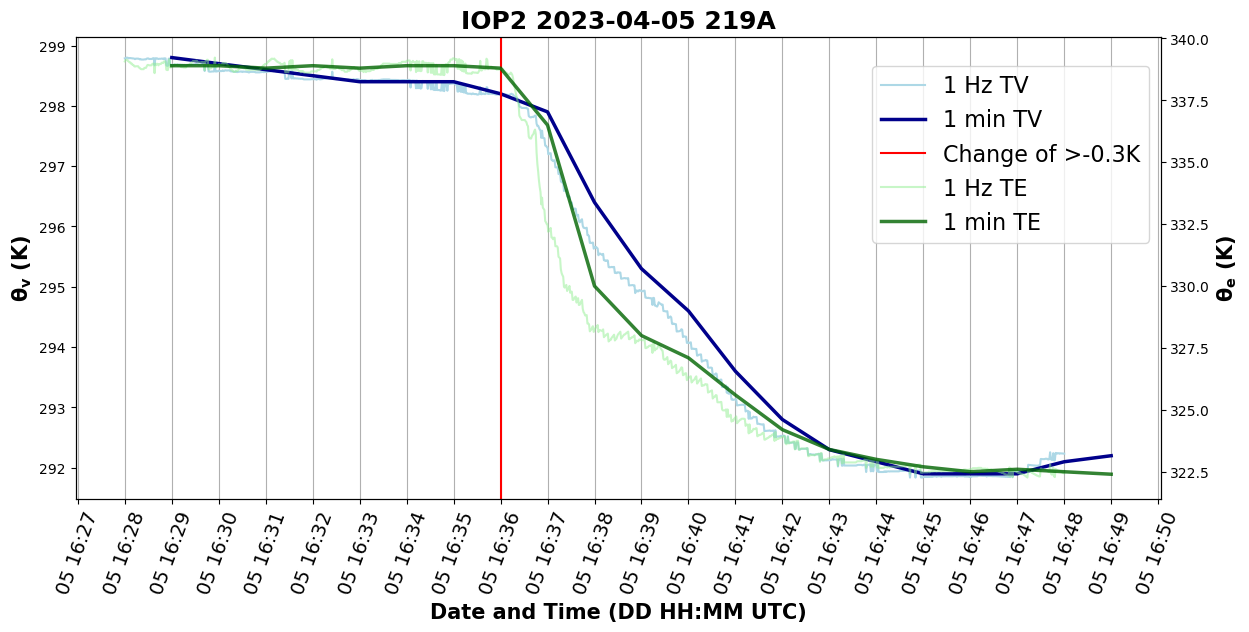

220A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0220A_IOP5_level2.txt


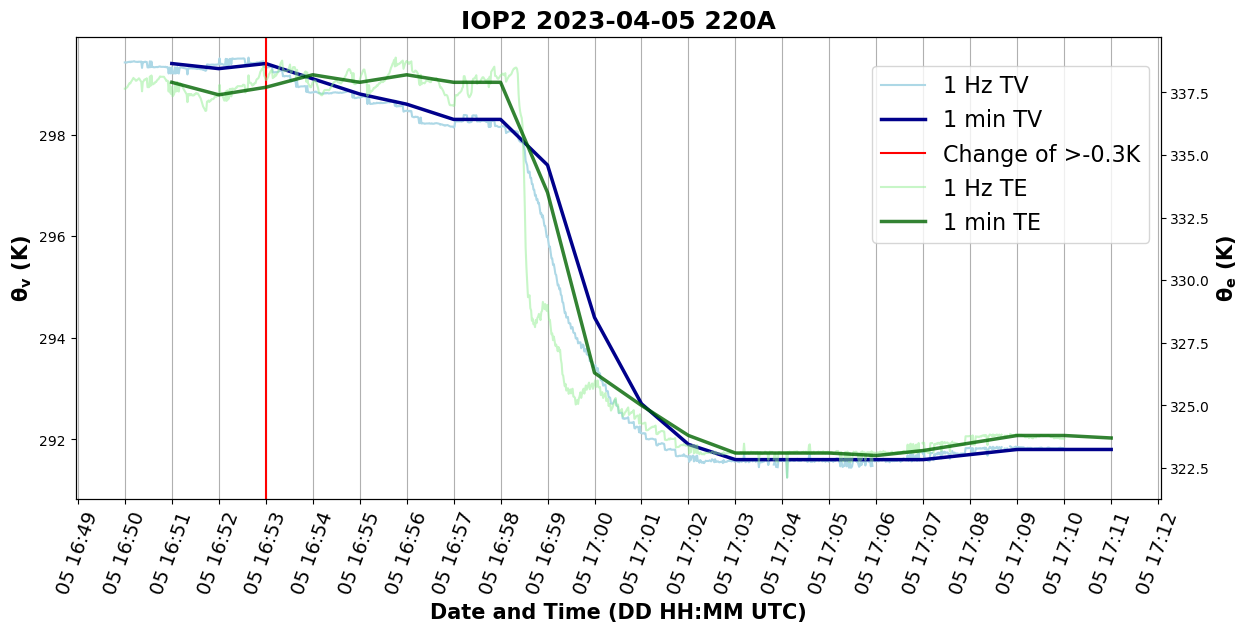

221A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0221A_IOP5_level2.txt


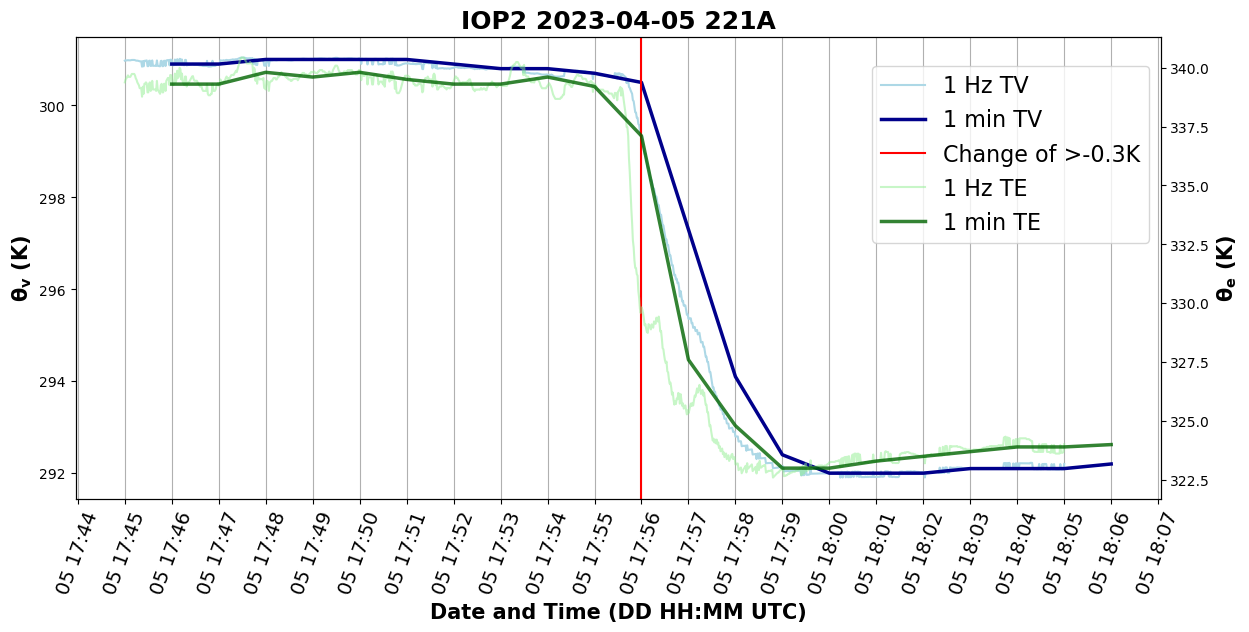

222A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0222A_IOP5_level2.txt


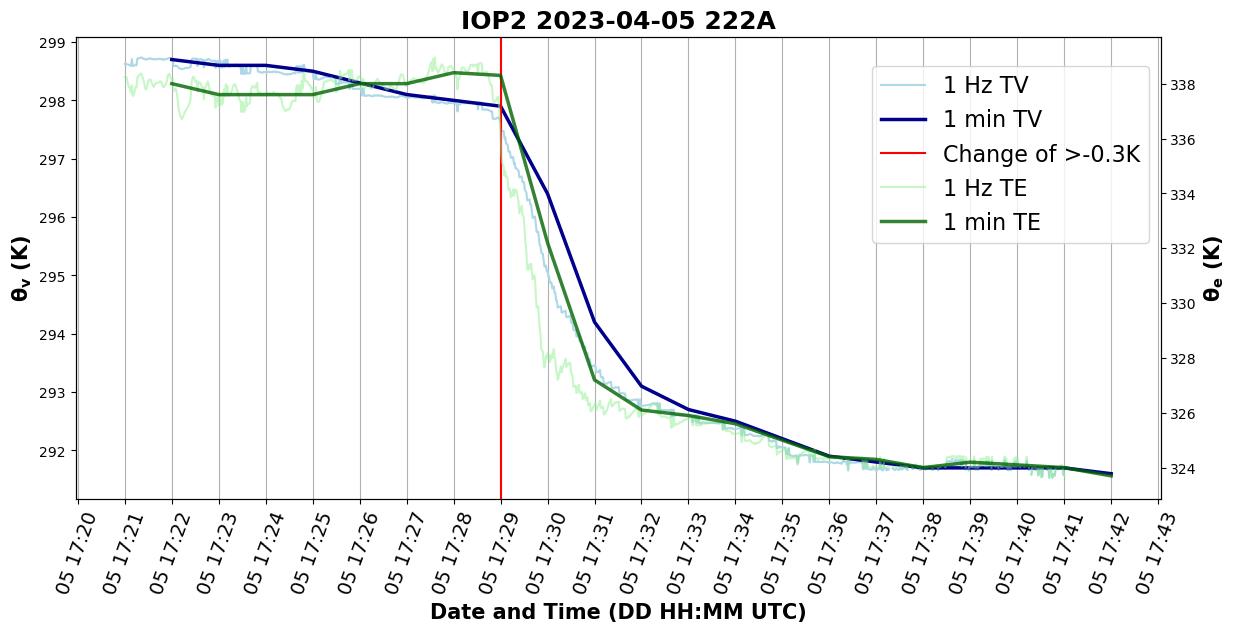

223A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0223A_IOP5_level2.txt


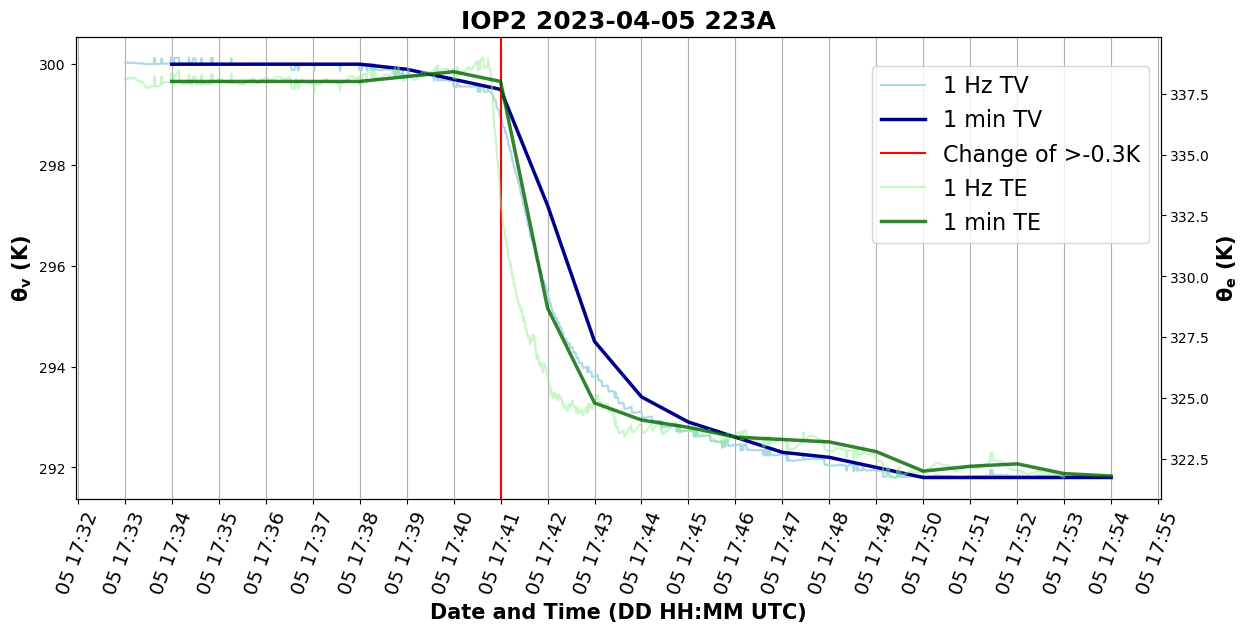

224A
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP5_20230405\level2\0224A_IOP5_level2.txt


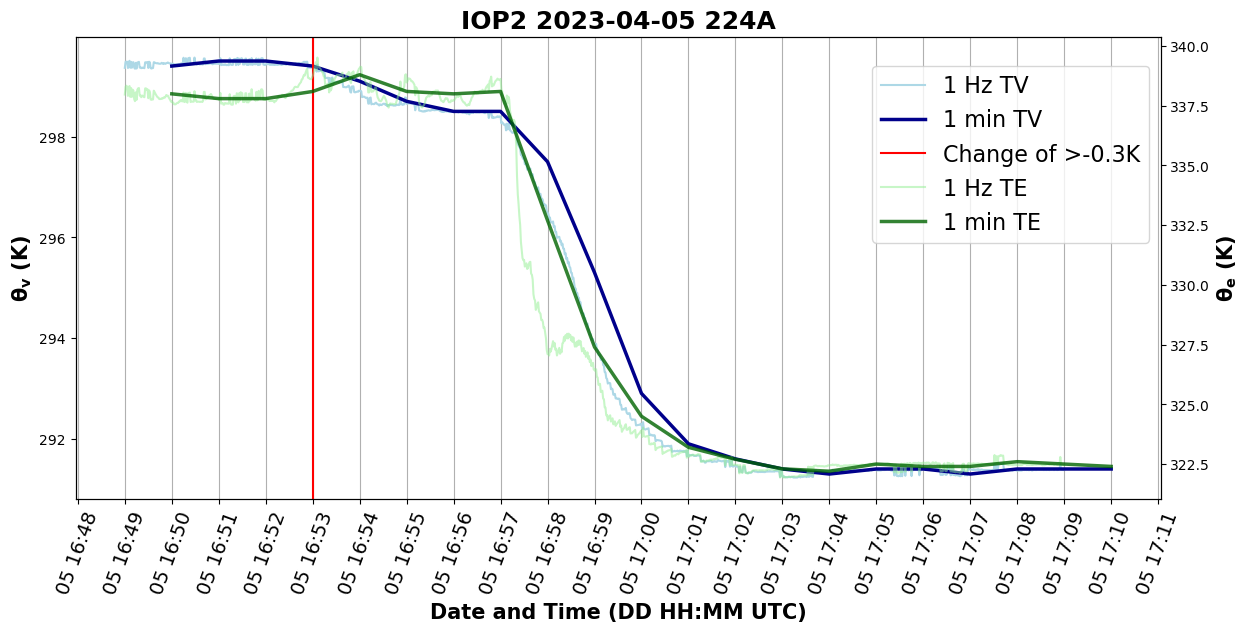

In [4]:
delta_k = {'2022-03-22':0.30,
           '2022-03-30':0.30,
           '2022-04-05':0.30,
           '2022-04-13':0.30,
          '2023-03-03':0.30,
          '2023-03-24':0.30,
          '2023-03-31':0.30,
          '2023-04-05':0.30}


for i in sns.index:
    # unpack data
    snid = sns.loc[i]['ID']
    print(snid)
    toa = pd.to_datetime(sns.loc[i]['TOA_coldpool'])
    date = (sns.loc[i]['date']).date()
    
    # get data around TOA -> 10 min on each side
    start = toa-dt.timedelta(minutes=10)
    duration=20
    met = get_1hz(date, i, start, duration)
    dewp = calc_dewpoint(met['T'],met['RH'])
    thetav = calc_thetav(met['T'], dewp, met['P'])
    thetae = calc_thetae(met['T'], dewp, met['P'])
    
    fig = figure(figsize=(14,6))
    plt.xticks(rotation=70, fontsize=14)
    ax = plt.gca()
    
    ax2 = ax.twinx()
    ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='lightgreen', alpha=0.5)
    te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
    ax2.plot(te_1min.index, te_1min, color='darkgreen', linewidth=2.5, alpha=0.8, label='1 min TE')
    
    ax.plot(pd.to_datetime(met.index), thetav, color='lightblue', label='1 Hz TV')
    
    tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
    ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")
    
    xlocator = md.MinuteLocator(interval = 1)
    ax.xaxis.set_major_locator(xlocator)
    ax.grid(axis='x')
        
    # plot current toa
    #ax.axvline(toa, color='k', label='{}'.format(toa))
    
    # plot methods toa (note, some will be off. check with methods table in manuscript)
    change=[]
    dk = -1*delta_k[str(date)]
    for i,val in enumerate(tv_1min):
        if i < (len(tv_1min) - 1):
            diff = tv_1min[i+1] - tv_1min[i]
            if diff<=-0.29:
                diff = -0.3
                change.append(diff)
            else:
                change.append(diff)
    idx = np.where(np.asarray(change) <= dk)
    
    change1=[]
    dk1 = -(2/3)*delta_k[str(date)]
    dk1 = np.round(dk1, decimals=1)
    for i,val in enumerate(tv_1min):
        if i < (len(tv_1min) - 1):
            diff1 = tv_1min[i+1] - tv_1min[i]
            if diff1<=-0.19:
                diff1 = -0.2
                change1.append(diff1)
            else:
                change1.append(diff1)
    idx1 = np.where(np.asarray(change1) <= dk1)
    
    if not idx[0].any() and not idx1[0].any():
        change2=[]
        dk2 = -(1/3)*delta_k[str(date)]
        dk2 = np.round(dk2, decimals=1)
        for i,val in enumerate(tv_1min):
            if i < (len(tv_1min) - 1):
                diff2 = np.round((tv_1min[i+1] - tv_1min[i]),1)
                if diff2<=-0.09:
                    diff2 = -0.1
                    change2.append(diff2)
                else:
                    change2.append(diff2)
        idx2 = np.where(np.asarray(change2) <= dk2)
#         groups = [(k, sum(1 for _ in g)) for k, g in groupby(change2)]

#         cursor = 0
#         length = []
    

#         for k, l in groups:
#             if (l >= 2):
#                 if (k <=-0.1):
#                     index = groups.index((k,l))
#                     for x,y in groups[0:index]:
#                         position = (int(y))
#                         if len(position)>index:
#                             length1 = np.sum(position[0:index])
#                             lenght.append(length1)
#                         else:
#                             length1 = np.sum(position)
#                             length.append(length1)
    if len(idx[0])>0:
        ax.axvline(tv_1min.index[idx[0][0]], color='r',label='Change of >{}K'.format(dk))
    elif len(idx1[0])>0:
        ax.axvline(tv_1min.index[idx1[0][0]], color='r',label='Change of >{}K'.format(dk1))
    else:
        ax.axvline(tv_1min.index[idx2[0][0]], color='darkred',label='Change of >{}K'.format(dk2))
    
    plt.title('IOP2 '+'{} {}'.format(date, snid), fontsize=18, weight='bold')
    fig.legend(bbox_to_anchor=(0.4, 0., 0.5, 0.85),fontsize=16)
    ax.set_xlabel('Date and Time (DD HH:MM UTC)',fontsize=15,weight='bold')
    ax.set_ylabel(r'$\mathbf{{\theta_v}}$ (K)',fontsize=15,weight='bold')
    ax2.set_ylabel(r'$\mathbf{{\theta_e}}$ (K)',fontsize=15,weight='bold')
    plt.show()
    fig.savefig(f'E:\\PERiLS_Y2\\methods\\TOA\\IOP5\\TOA{str(snid)}.png', format='png',bbox_inches='tight') #Change directory
    #plt.close()


### MAKE SURE ITS FOR MORE THAN +2 scans it k value is 0.1

# Calculating deficits 

There is some manual fixes for specific sticknets on where we find the base state.

In [3]:
def get_BSdist(SN, myvar):
    ''' finds the base state using a start (def_dist) and end (def_dist2) distance in km 
    (distance from TOA, which is placed at 0 m).
    
    myvar is either str TE or TV. '''
    
#     if IOP == 'IOP1':
#         if (SN.name == 3):
#             def_dist = 20*1000 
#             def_dist2 = 15*1000
#         elif (SN.name == 5) | (SN.name == 6) | (SN.name == 7) | (SN.name == 16) | (SN.name == 17) | (SN.name == 18) | (SN.name == 30) | (SN.name == 31):
#             def_dist = 27.5*1000 
#             def_dist2 = 22.5*1000
#         elif (SN.name == 9):
#             def_dist = 22.5*1000 
#             def_dist2 = 17.5*1000
#         else:
    def_dist = 15*1000 
    def_dist2 = 10*1000 
            
#     if IOP == 'IOP2':
#         def_dist = 15*1000 
#         def_dist2 = 10*1000
        
#     if IOP == 'IOP3':
#         if (SN.name == 0) | (SN.name == 2) | (SN.name == 4) | (SN.name == 9):
#             def_dist = 5*1000 
#             def_dist2 = 0*1000 
#         elif (SN.name == 18) | (SN.name == 24) | (SN.name == 20):
#             def_dist = 7.5*1000 
#             def_dist2 = 2.5*1000 
#         elif (SN.name == 6):
#             def_dist = 10*1000 
#             def_dist2 = 5*1000 
#         else:
#             def_dist = 15*1000 
#             def_dist2 = 10*1000 
            
#     if IOP == 'IOP4':
#         def_dist = 15*1000 
#         def_dist2 = 10*1000
        
    if int(SN.ID[1:3]) != SN.name+1:
        probe = int(SN.ID[1:3])-1
        starttime = pd.to_datetime(SN['TOA_coldpool_final']) - dt.timedelta(minutes=30)
        met = get_1hz(SN['date'], probe, starttime, 30) # pull 30 mins, should be more than enough
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled
        dist = abs(dist-dist[-1]) # distance going back in time starting at toa

        start = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0] # find where dist closest to 15
        end = np.where(abs(dist-def_dist2) == abs(dist-def_dist2).min())[0][0] # find where dist closest to 10
        change = np.nan

        #correction for short starts
        deldist = (def_dist-def_dist2) # delta distance from specified start and end distances
        if (end - start) < (deldist/storm_speed - 10) : # see if you have correct number of points
            start = 0
            ndist = storm_speed * delta_time
            end = np.where(abs(ndist-deldist) == abs(ndist-deldist).min())[0][0] # find 5 km from where data starts
            change = (ndist-ndist[-1])[0]


        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = np.nanmean(var[start:end])
        
    else:
        starttime = pd.to_datetime(SN['TOA_coldpool_final']) - dt.timedelta(minutes=30)
        met = get_1hz(SN['date'], SN.name, starttime, 30) # pull 30 mins, should be more than enough 
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled
        dist = abs(dist-dist[-1]) # distance going back in time starting at toa

        start = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0] # find where dist closest to 15
        end = np.where(abs(dist-def_dist2) == abs(dist-def_dist2).min())[0][0] # find where dist closest to 10
        change = np.nan

        #correction for short starts
        deldist = (def_dist-def_dist2) # delta distance from specified start and end distances
        if (end - start) < (deldist/storm_speed - 10) : # see if you have correct number of points
            start = 0
            ndist = storm_speed * delta_time
            end = np.where(abs(ndist-deldist) == abs(ndist-deldist).min())[0][0] # find 5 km from where data starts
            change = (ndist-ndist[-1])[0]


        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = np.nanmean(var[start:end])
    return  bs #met.index[start], met.index[end], change 

def get_distdef(SN, myvar, def_dist=15*1000):
    ''' def_dist is the distance in km that the deficit is considered.
    default is 10km'''
    if int(SN.ID[1:3]) != SN.name+1:
        probe = int(SN.ID[1:3])-1
        starttime = pd.to_datetime(SN['TOA_coldpool_final'])
        met = get_1hz(SN['date'], probe, starttime, 30) # pull 30 mins, should be more than enough
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled

        endtime = starttime + dt.timedelta(seconds=599) 

        # find where distance array is closest to 10km
        end = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0]

        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = get_BSdist(SN, myvar)

        minval = np.nanmin(var.iloc[0:end+1])

    else:
        starttime = pd.to_datetime(SN['TOA_coldpool_final'])
        met = get_1hz(SN['date'], SN.name, starttime, 30) # pull 30 mins, should be more than enough 
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        delta_time = (met.index[:]-met.index[0]).seconds
        dist = storm_speed * delta_time # distance traveled

        endtime = starttime + dt.timedelta(seconds=599) 

        # find where distance array is closest to 10km
        end = np.where(abs(dist-def_dist) == abs(dist-def_dist).min())[0][0]

        dewp = calc_dewpoint(met['T'],met['RH'])
        if myvar == 'TV':
            var = calc_thetav(met['T'], dewp, met['P'])
        if myvar == 'TE':
            var = calc_thetae(met['T'], dewp, met['P'])

        bs = get_BSdist(SN, myvar)

        minval = np.nanmin(var.iloc[0:end+1])
    return  minval - bs #met.index[0], met.index[end]           
            

In [4]:
#sns = pd.read_csv('VSE_Data_1Hz_gradtv.csv')
sns['TE_dist'] = np.nan
sns['TV_dist'] = np.nan

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        sns.loc[SN,'TE_dist'] = np.round(get_distdef(sns.loc[SN], 'TE'),2)
        sns.loc[SN,'TV_dist'] = np.round(get_distdef(sns.loc[SN], 'TV'),2)

0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_lev

20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
20
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0221A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
23
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\02

# Calculating gradients

You will need the U and V columns in the csv (calculated storm motion) to find the true gradient.

In [5]:
def get_correction_angle(u, v, ref):
    ''' ref is the storm reflectivity angle'''
    theta_motion = np.rad2deg(np.arctan(v/u))
    if (theta_motion < 0) & (ref < 0):
        theta_correction = np.deg2rad(abs(ref) - abs(theta_motion)) 
    else:
        theta_correction = np.deg2rad(abs(ref - theta_motion))
  
    return theta_correction

def findnearest(array, value):
    array = np.asarray(array)
    return (np.abs(array-value)).argmin()

def get_tvgrad(SN, distance, pretoa=2*1000, posttoa=10*1000):
    ''' SN is the sticknet data
    pretoa is meters before toa to start using data
    posttoa is meters after toa to stop using data
    distance is distance in meters to calculate the max thetav change. This should equal 1000 if you 
    want to be consistent with McDonald and Weiss 2021'''
    
    # check for empty files
    ref = SN['ref_angle']
    
    if np.isnan(ref)!= True:
    
        snid = SN['ID']
        print(snid)
        u = SN['U']
        v = SN['V']
        storm_speed = np.sqrt(u**2 + v**2)
        date = SN['date']
        toa = pd.to_datetime(SN['TOA_coldpool_final'])
        # grab time 15 minutes before toa and 30 minutes after, should be big enough buffer
        duration = 45 # note: found bug on 3/25/2020... duration was not set and was still 20(?). However,
                      # this does not change any of the values so we good
        if int(SN.ID[1:3]) != SN.name+1:
            probe = int(SN.ID[1:3])-1
            met = get_1hz(SN['date'], probe, toa - dt.timedelta(minutes=15), 45)
            dewp = calc_dewpoint(met['T'], met['RH'])
            tv = calc_thetav(met['T'], dewp, met['P'])

            # create distance array based on correction angle
            delta_time = (met.index[:]-met.index[0]).seconds
            dist = storm_speed * delta_time
            theta_c = get_correction_angle(u,v,ref)
            new_dist = dist * np.cos(theta_c)
            print(np.cos(theta_c))
            # center new_dist on TOA, negative values are before TOA, postive are after
            toa_idx = np.where(met.index==toa)[0][0]
            new_dist = new_dist - new_dist[toa_idx]
            start_idx = findnearest(new_dist, -1*pretoa)
            end_idx = findnearest(new_dist, posttoa)
            new_dist = new_dist[start_idx: end_idx]
            tv = tv[start_idx:end_idx]
            # create array to hold start and end indices equal to 1 km distance
            idx = []
            counter = 0
            for i, val in enumerate(new_dist[:]):
                i2 = findnearest(new_dist, val+distance)
                if i2 == duration*60: 
                    counter+=1
                if counter > 1: # if max index is used more than once, then skip everything else
                    idx.append([np.nan, np.nan])
                if counter <=1:
                    idx.append([i,i2])
            dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
            # EDIT 8 Sept 2020... I realized this wasnt divided by distance. It doesn't matter because
            # I had (THANK GOODNESS) been using 1 km distance, but I needed the edit now that I'm varying
            # the distance
            if len(dTV_dn)>0:
                grad = np.nanmin(dTV_dn)
            else:
                grad = np.nan
                
                
        else:
            met = get_1hz(SN['date'], SN.name, toa - dt.timedelta(minutes=15), 45)
            dewp = calc_dewpoint(met['T'], met['RH'])
            tv = calc_thetav(met['T'], dewp, met['P'])

            # create distance array based on correction angle
            delta_time = (met.index[:]-met.index[0]).seconds
            dist = storm_speed * delta_time
            theta_c = get_correction_angle(u,v,ref)
            new_dist = dist * np.cos(theta_c)
            print(np.cos(theta_c))
            # center new_dist on TOA, negative values are before TOA, postive are after
            toa_idx = np.where(met.index==toa)[0][0]
            new_dist = new_dist - new_dist[toa_idx]

            start_idx = findnearest(new_dist, -1*pretoa)
            end_idx = findnearest(new_dist, posttoa)
            new_dist = new_dist[start_idx: end_idx]
            tv = tv[start_idx:end_idx]

            # create array to hold start and end indices equal to 1 km distance
            idx = []
            counter = 0
            for i, val in enumerate(new_dist[:]):
                i2 = findnearest(new_dist, val+distance)
                if i2 == duration*60: 
                    counter+=1
                if counter > 1: # if max index is used more than once, then skip everything else
                    idx.append([np.nan, np.nan])
                if counter <=1:
                    idx.append([i,i2])

            dTV_dn = [(tv[i[1]] - tv[i[0]])/(distance/1000) for i in idx if np.isnan(i[0])== False]
            # EDIT 8 Sept 2020... I realized this wasnt divided by distance. It doesn't matter because
            # I had (THANK GOODNESS) been using 1 km distance, but I needed the edit now that I'm varying
            # the distance
            if len(dTV_dn)>0:
                grad = np.nanmin(dTV_dn)
            else:
                grad = np.nan
    else:
        snid = SN['ID']
        print(snid)
        grad = np.nan
    return snid, grad   #met.index[start_idx], met.index[end_idx]   

In [6]:
#sns = pd.read_csv('VSE_Data_1Hz_thermo_distance.csv', na_values=-999)

# sns['dTVdn'] = np.nan
for SN in sns.index:
    sticknet, grad = get_tvgrad(sns.loc[SN], 1000) # 1 km spacing
    sns.loc[SN,'dTVdn'] = np.round(grad,2)

101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0.7778733156423482
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
0.7467700520776268
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
0.5474814469683164
104A
3
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0104A_IOP4_level2.txt
0.6832162395496673
105A
4
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0105A_IOP4_level2.txt
0.3321245228451988
106A
5
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0106A_IOP4_level2.txt
0.6184848043669753
107A
6
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0107A_IOP4_level2.txt
0.7131105173758949
108A
109A
8
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0109A_IOP4_level2.txt
0.690950334192572
110A
9
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0110A_IOP4_level2.txt
0.2320821369652447
111A
10
E:\PERiLS_Y2\Dat

In [8]:
sns

,IOP,date,ID,lat,lon,array_type,mode,MC_rel_toa,type,tor,...,U,V,ref_angle,ref_contour,SM_mods,ref_mods,BS_mods,TE_dist,TV_dist,dTVdn
0,4,2023-03-31,101A,34.5838,-87.5469,Coarse,Mesocyclone,NaN,R,NT,...,32.5,5.4,-29.5,40.0,NaN,NaN,NaN,-0.33,-1.59,-0.31
1,4,2023-03-31,102A,34.6549,-87.3479,Coarse,Mesocyclone,NaN,R,NT,...,35.3,5.9,-32.2,44.0,NaN,NaN,NaN,-2.75,-2.36,-0.64
2,4,2023-03-31,103A,34.6175,-87.1015,Coarse,Mesocyclone,NaN,R,NT,...,38.1,8.8,-43.8,40.0,NaN,NaN,NaN,-0.06,-1.34,-0.38
3,4,2023-03-31,104A,34.5273,-87.2914,Fine,Mesocyclone,NaN,R,NT,...,40.1,8.6,-34.8,40.0,NaN,NaN,NaN,-1.05,-1.87,-0.43
4,4,2023-03-31,105A,34.9130,-87.5156,Coarse,Mesocyclone,NaN,R,NT,...,39.2,6.0,-61.9,40.0,NaN,NaN,NaN,-4.50,-3.36,-1.31
5,4,2023-03-31,106A,34.9000,-87.8161,Coarse,Mesocyclone,NaN,R,NT,...,33.0,3.0,-46.6,40.0,NaN,NaN,NaN,-4.48,-2.38,-0.68
6,4,2023-03-31,107A,34.5932,-87.9309,Coarse,Mesocyclone,NaN,R,NT,...,37.2,5.7,-35.8,40.0,NaN,NaN,NaN,0.34,-1.40,-0.31
7,4,2023-03-31,108A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,2023-03-31,109A,34.7967,-87.0036,Coarse,Mesocyclone,NaN,R,NT,...,39.0,9.0,-33.3,37.0,NaN,NaN,NaN,-0.39,-0.70,-0.24
9,4,2023-03-31,110A,34.8437,-87.2747,Coarse,Mesocyclone,NaN,R,NT,...,41.1,14.7,-56.9,34.0,NaN,NaN,NaN,-0.44,-0.46,-0.34


### plots to check methods work

make sure the deficit, base state, or grad tv functions are returning times and not values

In [25]:
# deficits


savedir= 'E:\\PERiLS_Y2\\methods\\BS_DF\\IOP4\\'

#sns = pd.read_csv('VSE_Data_1Hz.csv', na_values='-999' )
#sns = pd.read_csv(SNSfile, na_values='-999' )

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        # unpack data
        snid = sns.loc[SN]['ID']
        print(snid)
        toa = pd.to_datetime(sns.loc[SN]['TOA_coldpool_final'])
        date = sns.loc[SN]['date']

        # get data around TOA -> 10 min on each side
        start = toa-dt.timedelta(minutes=20)
        duration=40
        if int(sns.loc[SN].ID[1:3]) != sns.loc[SN].name+1:
            probe = int(sns.loc[SN].ID[1:3])-1
            met = get_1hz(sns.loc[SN]['date'], probe, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])

            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)

            # old methods
    #         axvspan(toa-dt.timedelta(minutes=20),toa-dt.timedelta(minutes=15), color='k', alpha=0.1)
    #         axvspan(toa,toa+dt.timedelta(minutes=10), color='k', alpha=0.1)

            # new methods
            bsstart, bsend, change= get_BSdist(sns.loc[SN], 'TV')
            defstart, defend = get_distdef(sns.loc[SN], 'TV')

            axvspan(bsstart, bsend, color='C0', alpha=0.25 )
            axvspan(defstart, defend, color='C0', alpha=0.2 )

            # check for change in base state method
            if bsstart == met.index[0]:
                ax.text(toa-dt.timedelta(minutes=20), np.min(thetav)+.2,
                        'BS start: {} m'.format(-1*np.round(change,0)), fontsize=18)
            plt.savefig('{}{}.png'.format(savedir,snid), bbox_inches='tight')
            plt.close()
        else:
            met = get_1hz(sns.loc[SN]['date'], sns.loc[SN].name, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])

            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)

            # old methods
    #         axvspan(toa-dt.timedelta(minutes=20),toa-dt.timedelta(minutes=15), color='k', alpha=0.1)
    #         axvspan(toa,toa+dt.timedelta(minutes=10), color='k', alpha=0.1)

            # new methods
            bsstart, bsend, change= get_BSdist(sns.loc[SN], 'TV')
            defstart, defend = get_distdef(sns.loc[SN], 'TV')

            axvspan(bsstart, bsend, color='C0', alpha=0.25 )
            axvspan(defstart, defend, color='C0', alpha=0.2 )

            # check for change in base state method
            if bsstart == met.index[0]:
                ax.text(toa-dt.timedelta(minutes=20), np.min(thetav)+.2,
                        'BS start: {} m'.format(-1*np.round(change,0)), fontsize=18)
            plt.savefig('{}{}.png'.format(savedir,snid), bbox_inches='tight')
            plt.close()

101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2

222B
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
222C
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
21
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0222A_IOP4_level2.txt
223B
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0223A_IOP4_level2.txt
22
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_202

In [26]:
# theta v gradients

savedir = 'E:\\PERiLS_Y2\\methods\\GRAD\\IOP4\\'

for SN in sns.index:
    if np.isnan(sns.loc[SN]['U']) == False:
        # unpack data
        snid = sns.loc[SN]['ID']
        toa = pd.to_datetime(sns.loc[SN]['TOA_coldpool_final'])
        date = sns.loc[SN]['date']
        print(snid)
        # get data around TOA -> 10 min on each side
        start = toa-dt.timedelta(minutes=20)
        duration=40
        if int(sns.loc[SN].ID[1:3]) != sns.loc[SN].name+1:
            probe = int(sns.loc[SN].ID[1:3])-1
            met = get_1hz(sns.loc[SN]['date'], probe, start, duration)
        
            dewp = calc_dewpoint(met['T'],met['RH'])


            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)


            # new methods
            gradstart, gradend = get_tvgrad(sns.loc[SN], 1000, posttoa=10*1000) 

            axvspan(gradstart, gradend, color='C0', alpha=0.25 )

            plt.savefig('{}{}.png'.format(savedir, snid), bbox_inches='tight')
            plt.close()
        else:
            
            met = get_1hz(sns.loc[SN]['date'], sns.loc[SN].name, start, duration)
            dewp = calc_dewpoint(met['T'],met['RH'])
       
            
            thetav = calc_thetav(met['T'], dewp, met['P'])
            thetae = calc_thetae(met['T'], dewp, met['P'])

            fig = figure(figsize=(14,6))
            plt.xticks(rotation=90, fontsize=12)
            ax = plt.gca()

            ax2 = ax.twinx()
            ax2.plot(pd.to_datetime(met.index), thetae, label='1 Hz TE', color='C2', alpha=0.5)
            te_1min = np.round(thetae.resample('1Min', label='right').mean(),1)
            ax2.plot(te_1min.index, te_1min, color='C2', linewidth=2.5, alpha=0.8)

            ax.plot(pd.to_datetime(met.index), thetav, label='1 Hz TV')

            tv_1min = np.round(thetav.resample('1Min', label='right').mean(),1)
            ax.plot(tv_1min.index, tv_1min, color='darkblue', linewidth=2.5, label="1 min TV")

            xlocator = md.MinuteLocator(interval = 1)
            ax.xaxis.set_major_locator(xlocator)
            ax.grid(axis='x')

            ax.axvline(toa, color='k', label='{}'.format(toa.strftime('%H%M UTC')))
            plt.title('{} {}'.format(date, snid), fontsize=18, weight='bold')
            ax.legend(fontsize=16)


            # new methods
            gradstart, gradend = get_tvgrad(sns.loc[SN], 1000, posttoa=10*1000) 

            axvspan(gradstart, gradend, color='C0', alpha=0.25 )

            plt.savefig('{}{}.png'.format(savedir, snid), bbox_inches='tight')
            plt.close()

101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
101A
0
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0101A_IOP4_level2.txt
0.7778733156423482
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
102A
1
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0102A_IOP4_level2.txt
0.7467700520776268
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
103A
2
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0103A_IOP4_level2.txt
0.5474814469683164
104A
3
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0104A_IOP4_level2.txt
104A
3
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0104A_IOP4_level2.txt
0.6832162395496673
105A
4
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0105A_IOP4_level2.txt
105A
4
E:\PERiLS_Y2\Data\PERiLS_data\IOP_data\IOP4_20230331\level2\0105A_IOP4_level2.txt
0.3321245228451988
106A
5
E:\PERiL